Autor: Eduardo Ureña Toledano

In [155]:
# Se importan las librerias necesarias.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import random

from itertools import cycle
from random import randrange
from collections import Counter
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

In [156]:
# Se lee el dataset modificado que contiene los enfermos de IM.
dataset = pd.read_csv('Myocardial_infarction_complications_Database_Modified_No_Missing.csv',sep=';')

In [217]:
# Se asigna un nombre a cada clase.
target_names = ['NO_COMP - 0', 'FIBR_PREDS - 1', 'PREDS_JELUD_TAH - 2', 'FIBR_JELUD - 3', 'A_V_BLOK - 4', 'OTEK_LANC - 5', 
                'LET_IS_RAZRIV - 6', 'DRESSLER - 7', 'ZSN - 8', 'REC_IM - 9', 'P_IM_STEN - 10', 'LET_IS - 11']

### 1. Análisis descriptivo de los datos

In [3]:
pd.set_option('display.max_columns', None)
dataset

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,COMPLICATION
0,64.0,0,0,6,2,1,2,0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,160,70,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.80,0,142.0,0.300,0.30,5.20,14.0,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,8
1,62.0,1,0,5,2,1,3,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,180,100,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.48,0,137.2,0.450,0.18,11.50,10.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2,54.0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,90,0,0,0,0,0,0,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.00,0,135.0,0.600,0.15,7.80,8.4,3.0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,8
3,80.0,1,0,1,2,2,2,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,100,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.06,0,136.6,0.408,0.29,5.00,20.0,9.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,8
4,64.0,1,3,0,0,2,3,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,100,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.20,0,138.0,0.150,0.15,10.90,19.0,2.0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,67.0,0,1,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,130,90,0,0,0,0,0,0,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.70,0,133.0,0.300,0.48,9.40,23.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11
1696,77.0,1,3,6,2,1,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110,70,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30,0,136.0,0.230,0.22,7.00,15.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,11
1697,77.0,0,0,0,0,2,2,0,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,80,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.40,0,142.0,0.300,0.15,9.30,11.0,6.0,2,0,0,0,1,0,0,1,0,0,2,0,0,0,0,1,1,1,0,0,11
1698,66.0,0,2,1,2,2,2,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,160,100,1,0,0,0,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.16,0,132.8,0.300,0.22,10.60,17.0,2.0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,11


In [4]:
# Se muestra el tipo de dato de cada atributo.
pd.set_option('display.max_rows', None)
dataset.dtypes

AGE              float64
SEX                int64
INF_ANAM           int64
STENOK_AN          int64
FK_STENOK          int64
IBS_POST           int64
GB                 int64
SIM_GIPERT         int64
DLIT_AG            int64
ZSN_A              int64
nr_11              int64
nr_01              int64
nr_02              int64
nr_03              int64
nr_04              int64
nr_07              int64
nr_08              int64
np_01              int64
np_04              int64
np_05              int64
np_07              int64
np_08              int64
np_09              int64
np_10              int64
endocr_01          int64
endocr_02          int64
endocr_03          int64
zab_leg_01         int64
zab_leg_02         int64
zab_leg_03         int64
zab_leg_04         int64
zab_leg_06         int64
S_AD_ORIT          int64
D_AD_ORIT          int64
O_L_POST           int64
K_SH_POST          int64
MP_TP_POST         int64
SVT_POST           int64
GT_POST            int64
FIB_G_POST         int64


In [5]:
# Se muestran las siguientes métricas para cada atributo: la media, la desviación estandar (std), los cuartiles, el máximo y el mínimo.
dataset.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,COMPLICATION
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.852118,0.626471,0.553529,2.171765,1.153529,1.125882,1.385882,0.033529,2.852941,0.188235,0.024706,0.002353,0.011176,0.020588,0.017059,0.000588,0.002353,0.001176,0.001765,0.006471,0.000588,0.003529,0.001176,0.001765,0.134118,0.024706,0.007647,0.078824,0.071176,0.021765,0.005294,0.012941,133.691176,82.286471,0.064706,0.027059,0.067059,0.004706,0.004706,0.008824,1.494118,0.821176,0.967059,0.248235,0.029412,0.605294,0.055882,0.013529,0.000588,0.207647,0.027059,0.034118,0.004706,0.120000,0.040588,0.041176,0.018824,0.002353,0.001176,0.001176,0.001176,0.018824,0.002941,0.001176,0.015882,0.060000,0.004118,0.005882,0.020000,0.016471,0.045882,0.007647,0.009412,0.040000,0.002353,0.005294,0.003529,0.001176,0.314118,4.213259,0.017647,136.658000,0.481379,0.262606,8.731759,13.712588,4.740118,0.312941,0.131765,0.071765,0.363529,0.412353,0.232941,0.114706,0.483529,0.088235,0.054118,0.330000,0.105882,0.078235,0.281765,0.126471,0.661765,0.707647,0.736471,0.017647,0.200588,4.100000
std,11.241265,0.483883,0.836248,2.428718,1.047132,0.813751,1.090615,0.180067,3.096946,0.649065,0.155273,0.048464,0.105157,0.142043,0.129529,0.024254,0.048464,0.034290,0.041984,0.080203,0.024254,0.059321,0.034290,0.041984,0.340879,0.155273,0.087138,0.269542,0.257195,0.145957,0.072589,0.113054,29.872289,17.436667,0.246079,0.162303,0.250197,0.068458,0.068458,0.093546,1.703602,0.881314,1.388203,0.685872,0.169007,0.488931,0.229762,0.115560,0.024254,0.405742,0.162303,0.181585,0.068458,0.325057,0.197392,0.198757,0.135941,0.048464,0.034290,0.034290,0.034290,0.135941,0.054169,0.034290,0.125057,0.237557,0.064055,0.076493,0.140041,0.127314,0.209291,0.087138,0

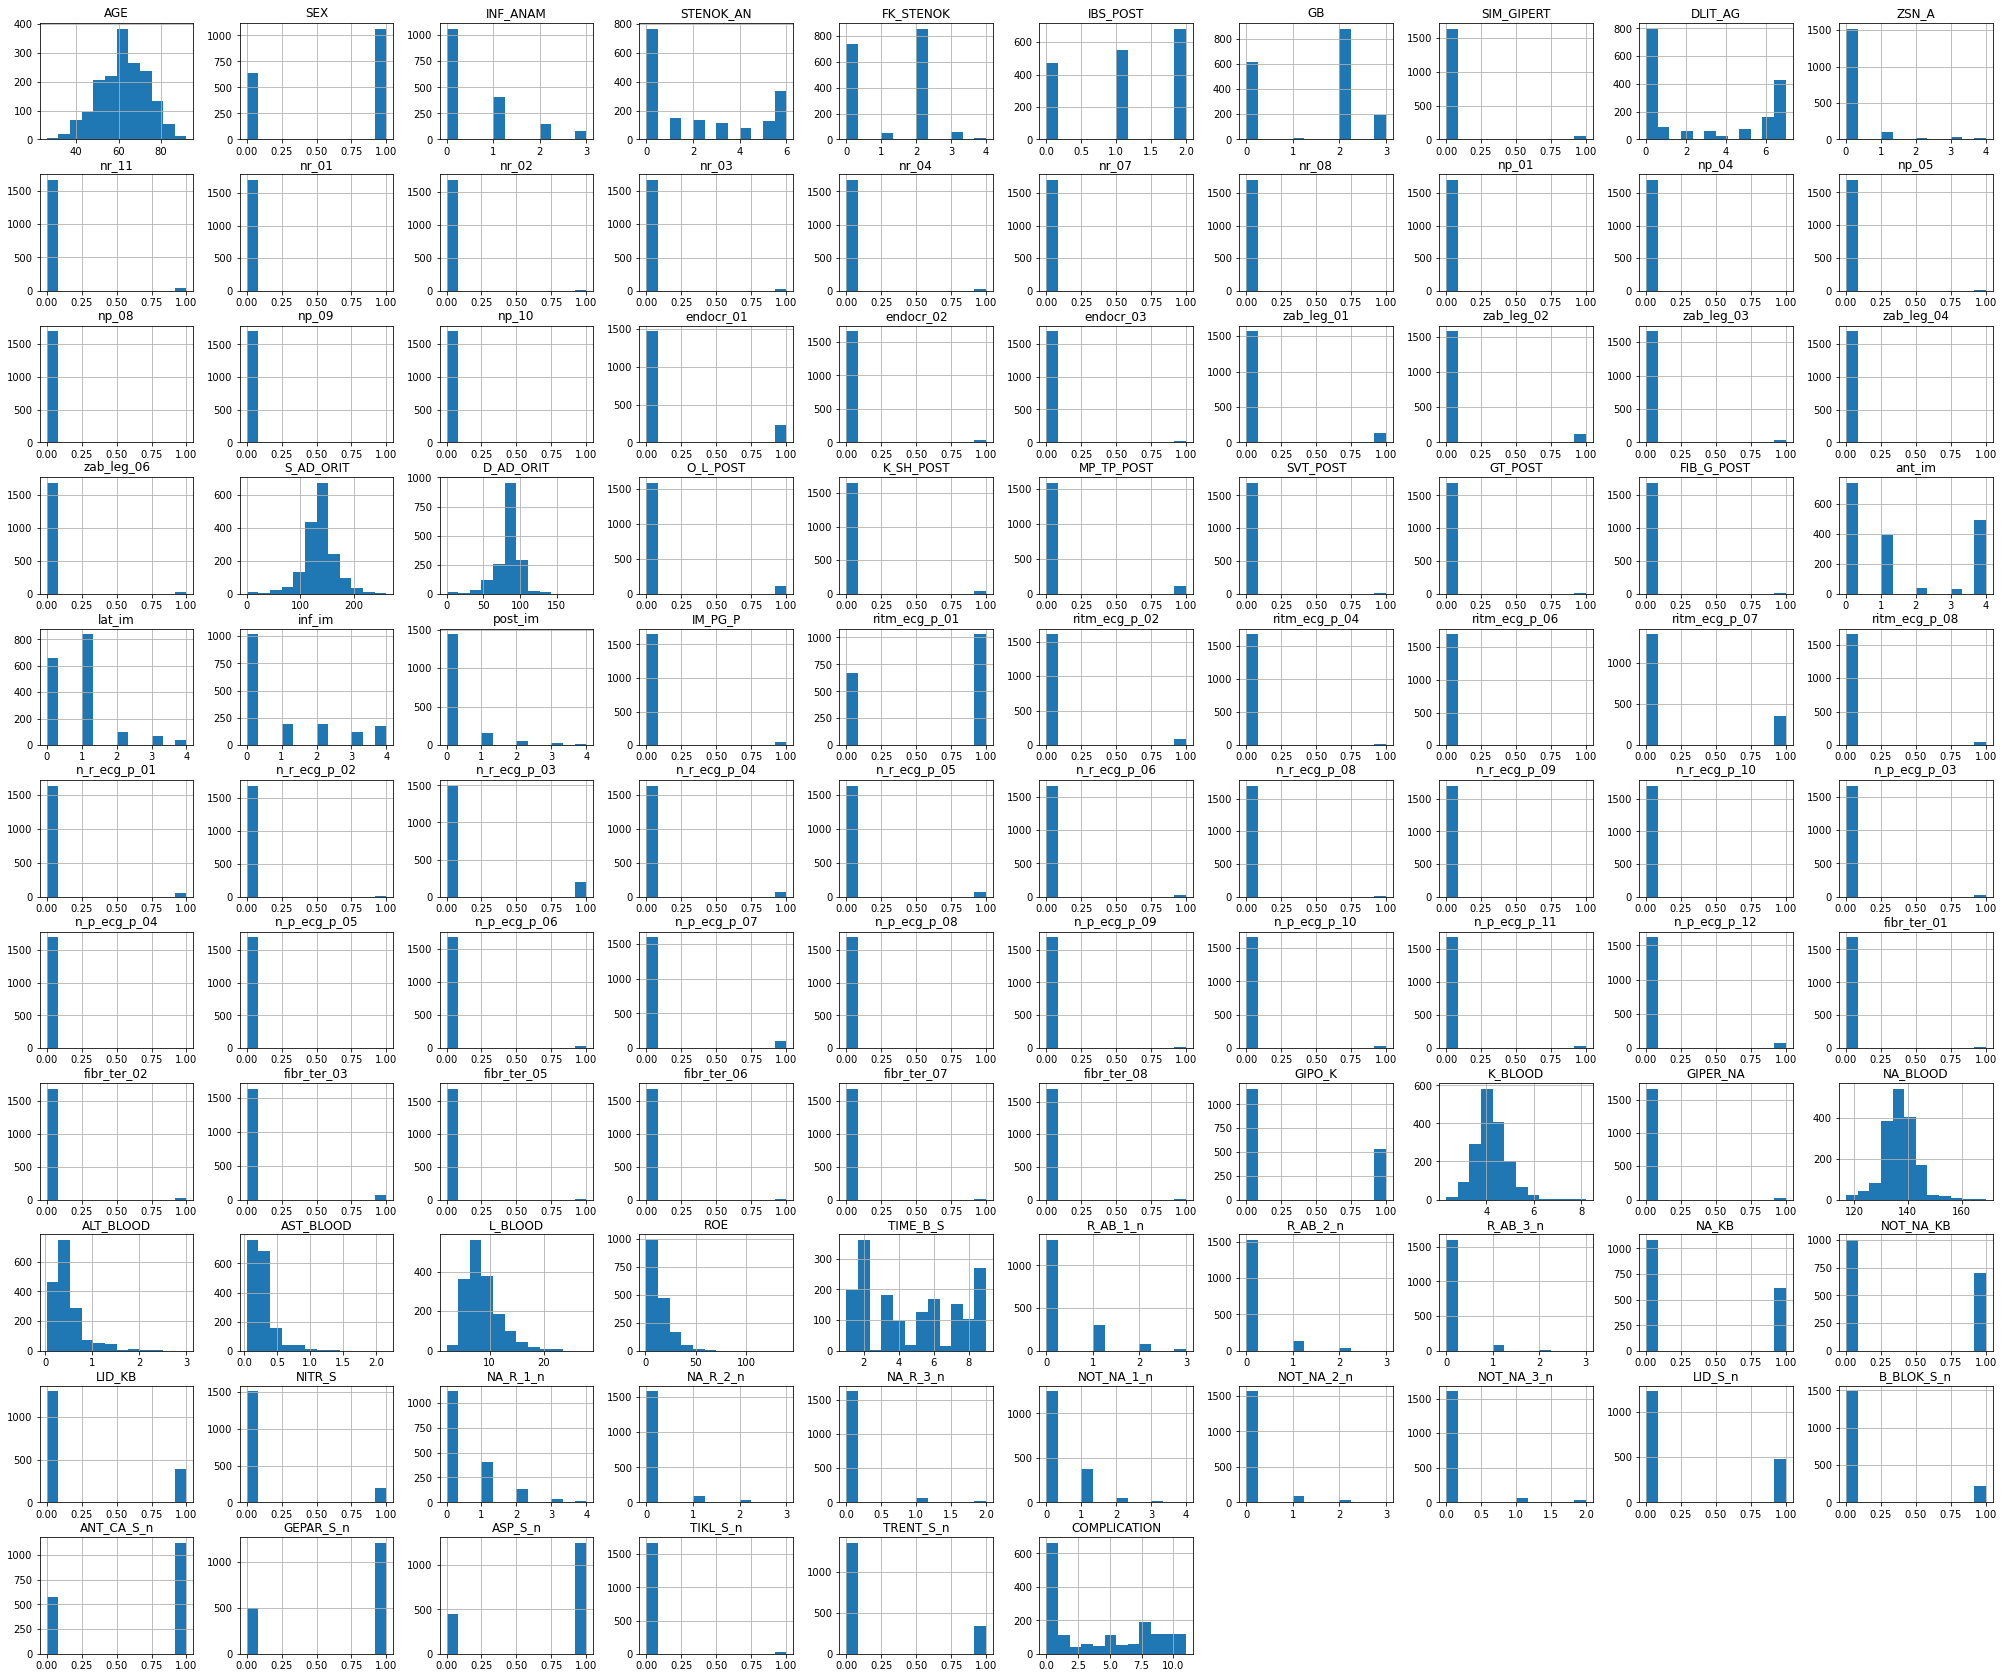

In [7]:
# Se muestra el histograma de cada atributo
histograms = dataset.hist(bins=12, figsize=(35,30))

[Text(0.5, 0, 'AGE'),
 Text(1.5, 0, 'SEX'),
 Text(2.5, 0, 'INF_ANAM'),
 Text(3.5, 0, 'STENOK_AN'),
 Text(4.5, 0, 'FK_STENOK'),
 Text(5.5, 0, 'IBS_POST'),
 Text(6.5, 0, 'GB'),
 Text(7.5, 0, 'SIM_GIPERT'),
 Text(8.5, 0, 'DLIT_AG'),
 Text(9.5, 0, 'ZSN_A'),
 Text(10.5, 0, 'nr_11'),
 Text(11.5, 0, 'nr_01'),
 Text(12.5, 0, 'nr_02'),
 Text(13.5, 0, 'nr_03'),
 Text(14.5, 0, 'nr_04'),
 Text(15.5, 0, 'nr_07'),
 Text(16.5, 0, 'nr_08'),
 Text(17.5, 0, 'np_01'),
 Text(18.5, 0, 'np_04'),
 Text(19.5, 0, 'np_05'),
 Text(20.5, 0, 'np_08'),
 Text(21.5, 0, 'np_09'),
 Text(22.5, 0, 'np_10'),
 Text(23.5, 0, 'endocr_01'),
 Text(24.5, 0, 'endocr_02'),
 Text(25.5, 0, 'endocr_03'),
 Text(26.5, 0, 'zab_leg_01'),
 Text(27.5, 0, 'zab_leg_02'),
 Text(28.5, 0, 'zab_leg_03'),
 Text(29.5, 0, 'zab_leg_04'),
 Text(30.5, 0, 'zab_leg_06'),
 Text(31.5, 0, 'S_AD_ORIT'),
 Text(32.5, 0, 'D_AD_ORIT'),
 Text(33.5, 0, 'O_L_POST'),
 Text(34.5, 0, 'K_SH_POST'),
 Text(35.5, 0, 'MP_TP_POST'),
 Text(36.5, 0, 'SVT_POST'),
 Text(37.5,

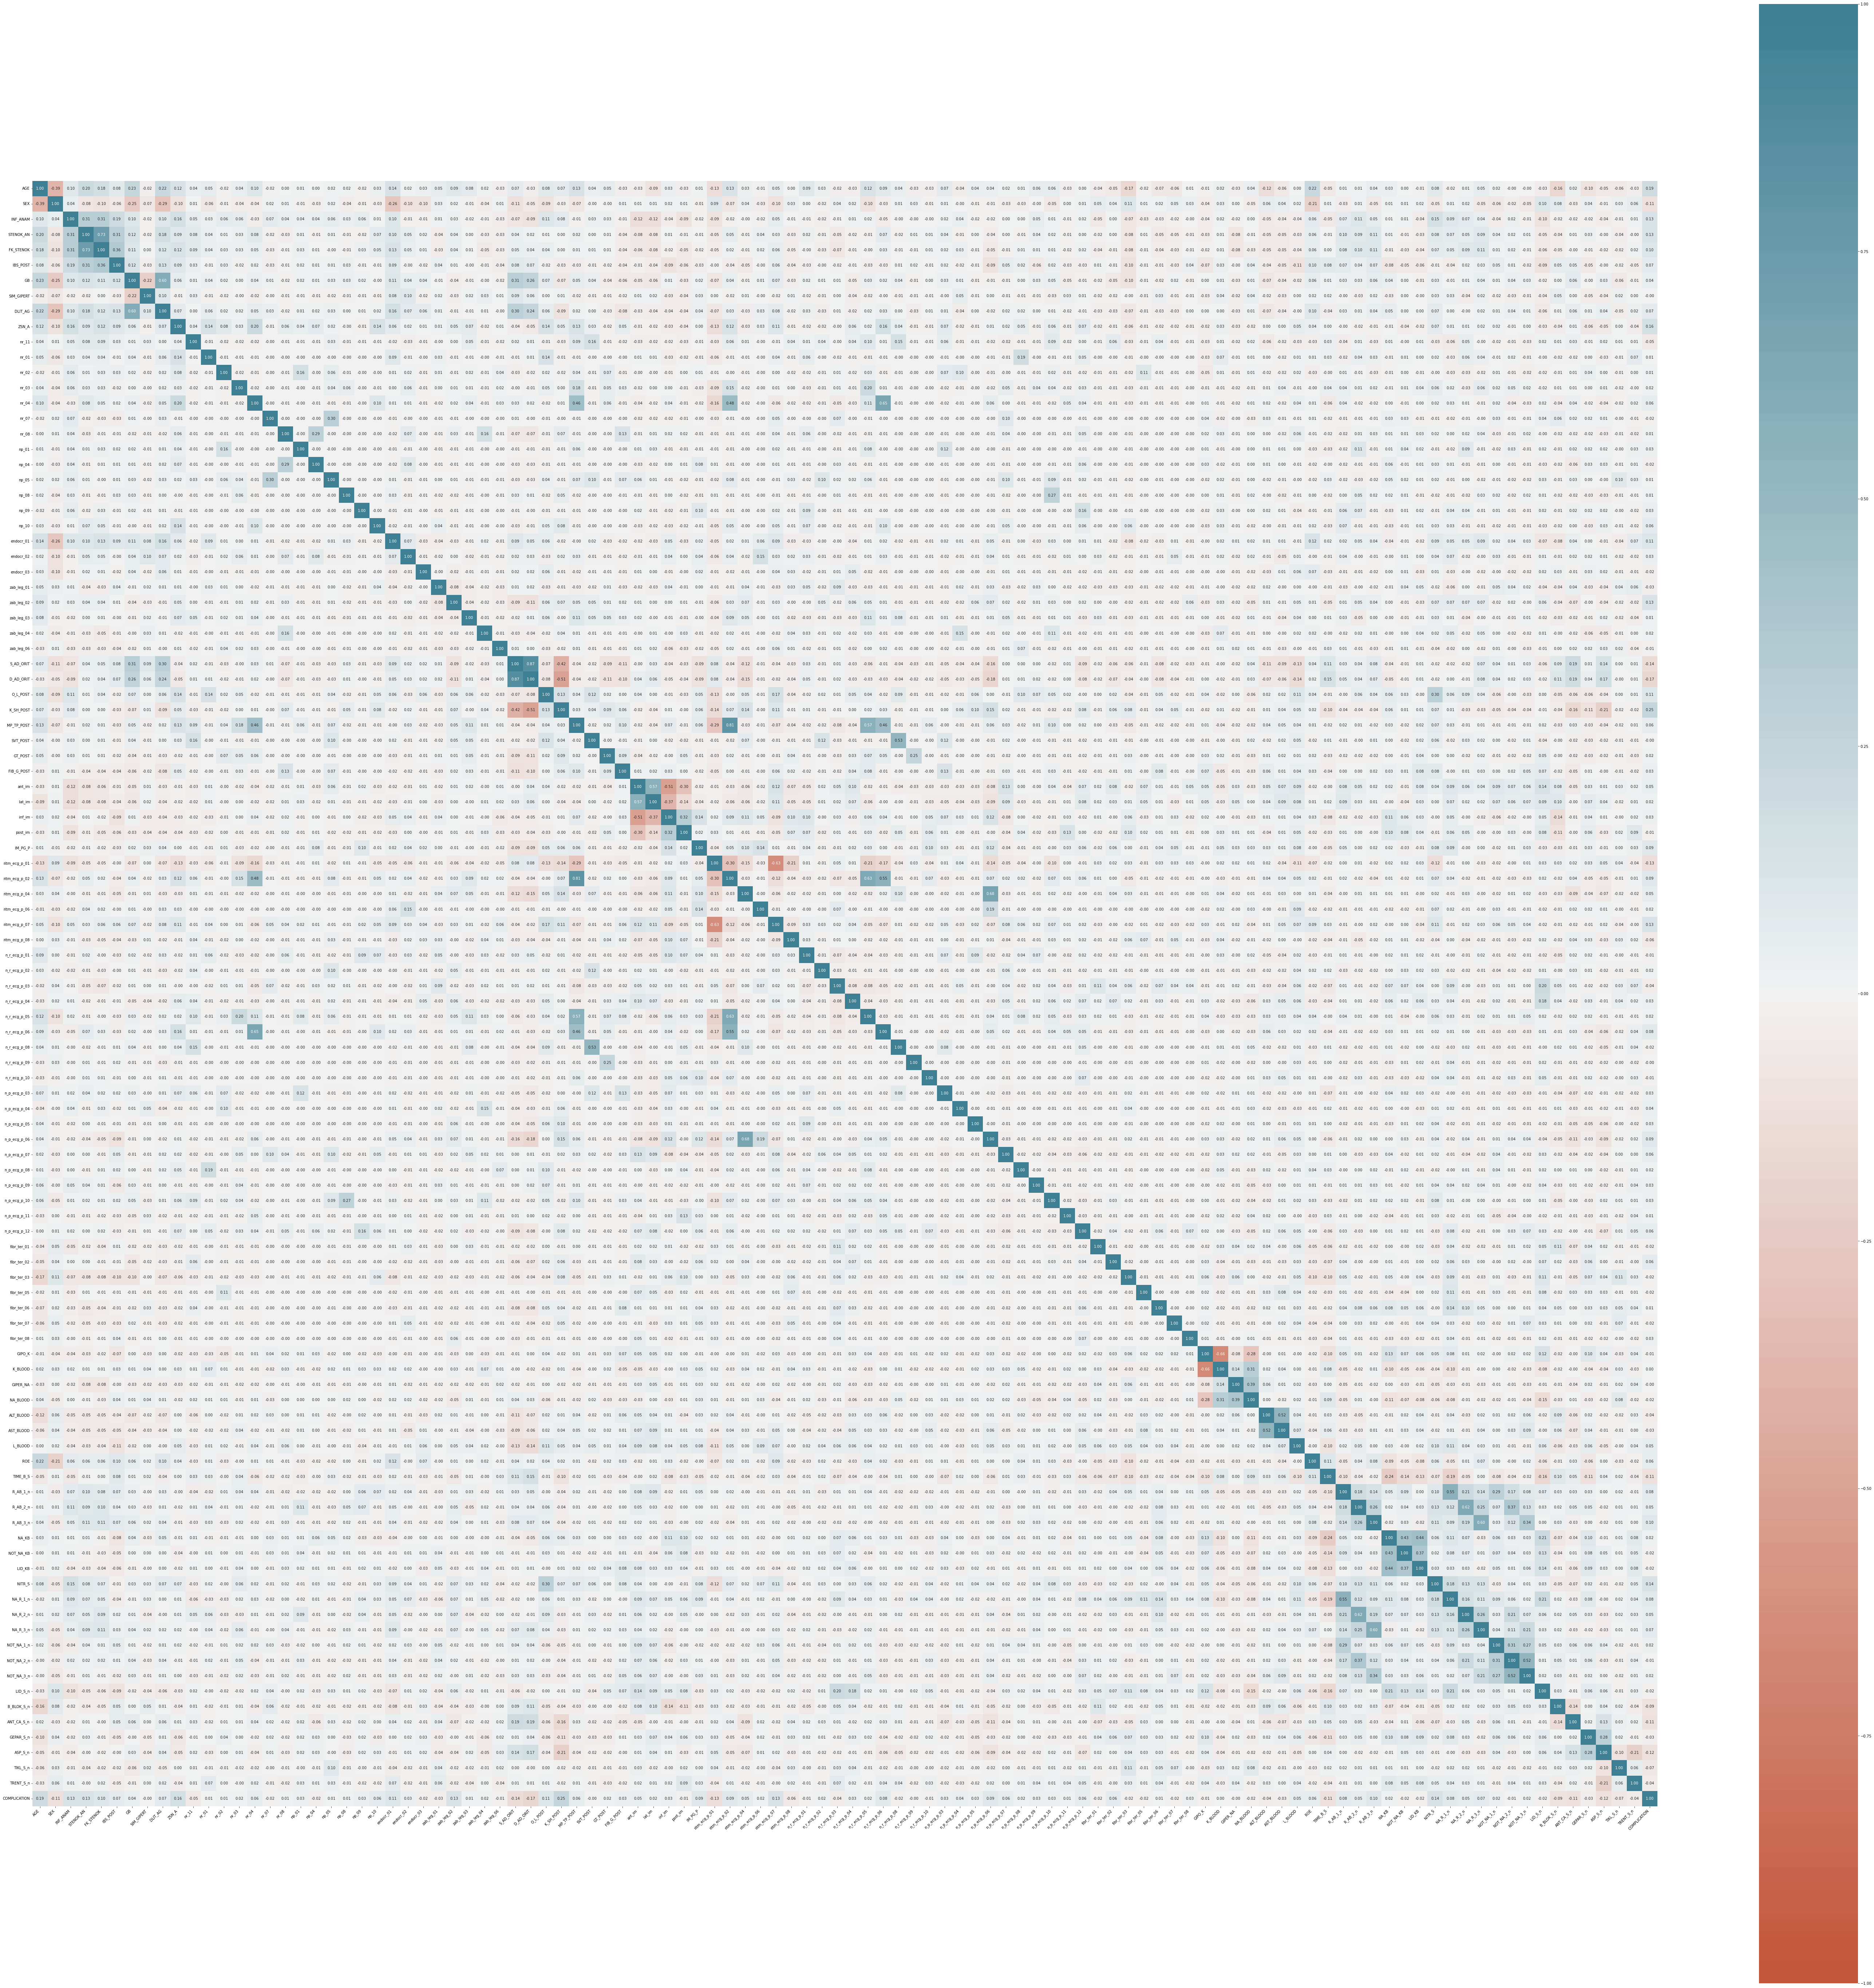

In [8]:
# Se calcula el coeficiente de correlación de Pearson para ver la correlación de cada atributo con el que se quiere predecir.
corr = dataset.corr(method ='pearson') 

plt.figure(figsize=(100,100))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)


ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

### 2. Preprocesado de los datos

In [157]:
# Se aleatoriza el orden de los ejemplos
sklearn.utils.shuffle(dataset)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,COMPLICATION
1683,80.0,1,3,5,2,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,11
298,63.0,1,1,2,2,2,2,0,7,0,...,0,0,1,0,1,1,1,0,1,8
4,64.0,1,3,0,0,2,3,0,5,0,...,1,0,1,0,1,1,1,0,0,8
347,65.0,1,0,0,2,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1092,34.0,1,0,4,2,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,58.0,1,0,0,0,2,2,0,2,0,...,0,0,0,0,1,0,1,0,0,0
831,44.0,1,3,2,2,2,2,0,1,0,...,0,0,1,0,0,1,1,0,1,5
251,75.0,1,1,5,2,2,2,0,3,3,...,0,0,0,0,1,1,0,0,1,0
414,53.0,1,1,2,2,1,2,0,6,0,...,0,1,0,1,0,0,0,0,0,0


In [158]:
# Conjunto de variables de entrada.
X = dataset.iloc[:,:-1].values

# Conjunto de variables de salida.
y = dataset.iloc[:,-1].values

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Se dividen los datos en conjunto de entrenamiento y prueba mediante validacion cruzada estratificada.
skf = StratifiedKFold(n_splits=5)

train_index, test_index = next(iter(skf.split(X, y)))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

In [160]:
# Se normalizan los valores de las variables independientes.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [162]:
# Se observa el numero de ejemplos de cada clase en el conjunto de entrenamiento
print ("Distribution {}".format(Counter(y_train)))

Distribution Counter({0: 531, 8: 153, 10: 96, 9: 95, 11: 95, 1: 91, 5: 90, 3: 49, 7: 47, 6: 43, 4: 37, 2: 33})


### Clasificación con Naïve Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Se crea un modelo para usar los datos sin normalizar y otro para usar los datos normalizados.
model_nb = MultinomialNB()

In [33]:
# Se entrena el modelo sin normalizar
model_nb = model_nb.fit(X_train,y_train)

# Se realizan las predicciones
y_pred_nb = model_nb.predict(X_test)
#y_pred_norm_nb = model_nb_norm.predict(X_test_norm)

In [34]:
# Se muestran las predicciones del modelo sin normalizar.
y_pred_nb

array([ 8,  8,  0,  0,  0,  0,  1,  0,  0,  8,  5,  8,  8,  0,  0,  8,  5,
        8,  0,  0,  0,  0,  0,  5,  4,  0, 10,  0, 10,  0,  0,  0,  0,  8,
        8,  0,  7,  7,  4,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        5,  0,  0,  0,  0, 10,  0,  4, 10,  0,  0, 11,  0,  0,  0,  7,  0,
       11,  0,  0,  0,  0,  0,  8,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
       10, 10,  0,  0,  0,  4,  0,  8,  0,  0,  0,  0,  0,  5,  0, 10,  0,
        2,  0,  3,  4, 10,  0,  0,  3,  3,  0,  7,  9,  0,  0,  0,  4, 11,
        0,  4,  1,  8,  0,  0, 11,  0,  0, 11, 10, 11, 10,  3,  9,  0,  0,
        1,  8,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  9,  0, 10,  0,  0, 10,  5,  6,  5,  0,  0,  0,  4,  1,
        0,  5,  0,  0,  4,  4,  8,  0, 10,  0,  0,  0,  8,  0,  0,  7,  0,
        5, 11,  0,  0,  0,  3,  0,  0,  5,  8, 10,  0,  0, 10,  8, 10,  1,
        7,  5,  0,  0,  9, 11,  0,  7,  0, 11, 11,  0,  0, 10,  0,  0,  0,
        0,  5,  7,  3,  4

In [35]:
# Se muestran los datos reales del conjunto de test para el atributo COMPLICATION.
y_test

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  8,  8,  0,  0,
        8,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  0,  0,  8,  8,
        0,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  5,  5,  4,  2,  5, 10,  2,  5,  2, 10,  4, 10, 10,  4,  5,
       10,  3, 10, 10,  2,  7,  7, 10,  7,  4, 10,  2,  5,  4,  5,  4,  2,
        3,  4,  3,  2, 10, 10,  1,  1,  1,  1,  2,  5,  2, 10, 10, 10, 10,
       10,  5,  9,  5,  4

In [365]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_nb, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_nb, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_nb, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_nb, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_nb, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_nb, average='weighted'))

micro-recall: 0.36764705882352944
weighted-recall: 0.36764705882352944

micro-precision: 0.36764705882352944
weighted-precision: 0.3432172857947316

micro-F1: 0.3676470588235295
weighted-F1: 0.3426864614719144


In [218]:
display(confusion_matrix(y_test, y_pred_nb)) # Se muestra la matriz de confusión con los datos sin normalizar.
clas_report=classification_report(y_test, y_pred_nb, target_names=target_names) # Se muestran distintas métricas del conjunto de test con los datos sin normalizar.
print(clas_report)

array([[90,  3,  0,  2,  4,  5,  1,  4,  3,  3, 13,  4],
       [11,  2,  0,  0,  0,  1,  1,  1,  1,  2,  1,  2],
       [ 5,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 5,  0,  0,  0,  2,  0,  0,  1,  0,  1,  0,  3],
       [ 0,  0,  0,  0,  2,  2,  0,  1,  2,  0,  3,  0],
       [ 8,  1,  0,  1,  2,  2,  0,  1,  3,  0,  1,  3],
       [ 3,  0,  0,  1,  1,  1,  1,  1,  0,  1,  2,  0],
       [ 7,  2,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0],
       [15,  1,  1,  2,  5,  3,  0,  0, 10,  0,  0,  2],
       [ 8,  0,  1,  2,  2,  3,  0,  2,  0,  2,  2,  2],
       [14,  0,  0,  0,  0,  1,  0,  1,  0,  2,  3,  3],
       [ 1,  1,  1,  0,  1,  2,  2,  1,  0,  1,  0, 13]], dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.54      0.68      0.60       132
     FIBR_PREDS - 1       0.18      0.09      0.12        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.10      0.20      0.13        10
      OTEK_LANC - 5       0.09      0.09      0.09        22
  LET_IS_RAZRIV - 6       0.20      0.09      0.13        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.53      0.26      0.34        39
         REC_IM - 9       0.17      0.08      0.11        24
     P_IM_STEN - 10       0.12      0.12      0.12        24
        LET_IS - 11       0.39      0.57      0.46        23

           accuracy                           0.37       340
          macro avg       0.19      0.18      0.18       340
       weighted avg       0.34      0.37      0.34       340



In [38]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_nb.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6711366376686941


#### Random Search con Naïve Bayes

In [39]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando Naive Bayes.

parameters_nb = {'alpha': loguniform(1e-5, 1e3),
                 'fit_prior': [False, True]}
model_nb_rand = MultinomialNB()
model_nb_rand = RandomizedSearchCV(estimator = model_nb_rand, param_distributions = parameters_nb, scoring = 'recall_micro', cv = 5, n_iter = 1000)

In [40]:
model_nb_rand = model_nb_rand.fit(X_train, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento sin normalizar

In [41]:
model_nb_rand.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'alpha': 11.077421178716211, 'fit_prior': False}

In [42]:
score_nb_rand_train = model_nb_rand.score(X_train, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_nb_rand_train

0.4323529411764706

In [43]:
score_svm_rand_test = model_nb_rand.score(X_test, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_svm_rand_test

0.4235294117647059

In [44]:
y_pred_nb_rand = model_nb_rand.predict(X_test) # Se predice el atributo COMPLICATION.

In [367]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_nb_rand, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_nb_rand, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_nb_rand, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_nb_rand, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_nb_rand, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_nb_rand, average='weighted'))

micro-recall: 0.4235294117647059
weighted-recall: 0.4235294117647059

micro-precision: 0.4235294117647059
weighted-precision: 0.26903814466963255

micro-F1: 0.4235294117647059
weighted-F1: 0.30724292759700234


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
display(confusion_matrix(y_test, y_pred_nb_rand)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_nb_rand, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[125,   0,   0,   0,   0,   3,   0,   0,   1,   0,   0,   3],
       [ 20,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  7,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  6,   1,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [ 11,   2,   0,   0,   0,   2,   0,   0,   3,   1,   0,   3],
       [  6,   1,   0,   0,   0,   2,   0,   0,   1,   1,   0,   0],
       [ 10,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 27,   1,   0,   0,   0,   1,   0,   1,   5,   0,   1,   3],
       [ 17,   0,   0,   0,   0,   2,   0,   0,   2,   0,   1,   2],
       [ 20,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   2],
       [  6,   0,   0,   0,   0,   2,   0,   0,   2,   1,   1,  11]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.47      0.95      0.63       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.17      0.09      0.12        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.29      0.13      0.18        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.20      0.04      0.07        24
        LET_IS - 11       0.39      0.48      0.43        23

           accuracy                           0.42       340
          macro avg       0.13      0.14      0.12       340
       weighted avg       0.27      0.42      0.31       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_nb_rand.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6459945984806482


In [47]:
results_nb_rand = pd.DataFrame(model_nb_rand.cv_results_)
results_nb_rand = results_nb_rand.sort_values(by=["rank_test_score"])
results_nb_rand = results_nb_rand.set_index(
    results_nb_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_nb_rand[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
9.495618922516678_True,1,0.421324,0.005974,0.003125
11.077421178716211_False,1,0.421324,0.007204,0.000000
16.405094487199218_True,3,0.419853,0.003602,0.000000
12.894676356242977_False,3,0.419853,0.007129,0.006249
13.206776387099504_False,3,0.419853,0.007851,0.001802
...,...,...,...,...
0.010046933313443732_False,965,0.213235,0.023368,0.000000
0.0009569170069229144_False,965,0.213235,0.021812,0.006249
0.0011950433996646712_False,965,0.213235,0.022663,0.000000


### Clasificación con Árboles de Decisión

In [48]:
from sklearn.tree import DecisionTreeClassifier 

# Se crea un modelo para usar los datos sin normalizar.
model_dt = DecisionTreeClassifier()

In [49]:
# Se entrena el modelo
model_dt = model_dt.fit(X_train,y_train)

# Se realizan predicciones
y_pred_dt = model_dt.predict(X_test)

In [50]:
# Se muestran las predicciones del modelo.
y_pred_dt

array([10,  8,  0,  8,  0,  6,  5, 10,  8,  0,  1,  0,  0,  1,  8,  5,  0,
        2,  9, 10,  0,  0,  0,  8,  0,  0, 10,  0,  0,  0,  5, 10,  0,  8,
        1,  5,  0,  3, 10,  7,  0,  0,  8,  0,  0,  0,  9,  2,  2,  0, 11,
       10,  0,  0,  0,  0,  0,  8,  8,  0,  5,  8,  3,  0, 10, 10,  0,  0,
        6,  8,  0,  0,  0,  1,  0,  0,  1,  8,  1,  3,  0,  0,  0,  0,  0,
        0,  0,  0, 10,  0,  1,  1,  8,  5, 10,  0,  1, 10,  0,  9,  9,  0,
        8,  8,  2,  9,  2,  0,  0,  9,  2,  0,  5,  0,  0, 10,  0,  0,  0,
        0,  8,  9,  8,  9,  2,  0,  0,  0,  0,  0,  8,  1,  2,  0,  0,  0,
        1, 10,  0,  0,  0,  0,  9,  0,  8,  1,  0,  9,  0,  0, 11,  2,  9,
        8,  0,  0,  8,  8,  8,  5,  0,  7, 10,  3,  0,  8,  4,  0,  3,  0,
        9,  8, 10, 11, 11,  0,  0,  0,  0,  0,  4,  3,  8,  8, 10,  7,  8,
        0, 11,  0,  8,  8,  8,  8,  0,  0,  8,  0,  0,  0,  0,  4,  8,  4,
        0,  8,  7,  0,  0,  0,  0, 10,  7,  0, 10,  4,  8, 11,  0,  0,  0,
        0,  8,  0,  5,  0

In [52]:
# Se muestran los datos reales del conjunto de test para el atributo COMPLICATION.
y_test

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  8,  8,  0,  0,
        8,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  0,  0,  8,  8,
        0,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  5,  5,  4,  2,  5, 10,  2,  5,  2, 10,  4, 10, 10,  4,  5,
       10,  3, 10, 10,  2,  7,  7, 10,  7,  4, 10,  2,  5,  4,  5,  4,  2,
        3,  4,  3,  2, 10, 10,  1,  1,  1,  1,  2,  5,  2, 10, 10, 10, 10,
       10,  5,  9,  5,  4

In [366]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_dt, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_dt, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_dt, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_dt, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_dt, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_dt, average='weighted'))

micro-recall: 0.3
weighted-recall: 0.3

micro-precision: 0.3
weighted-precision: 0.28732786412033723

micro-F1: 0.3
weighted-F1: 0.29222843602177023


In [220]:
display(confusion_matrix(y_test, y_pred_dt)) # Se muestra la matriz de confusión con los datos sin normalizar.
clas_report=classification_report(y_test, y_pred_dt, target_names=target_names) # Se muestran distintas métricas del conjunto de test con los datos sin normalizar.
print(clas_report)

array([[69,  8,  7,  5,  1,  5,  0,  2, 13,  9, 11,  2],
       [12,  0,  1,  1,  0,  0,  1,  1,  0,  1,  4,  1],
       [ 4,  0,  0,  0,  2,  0,  0,  0,  2,  0,  1,  0],
       [ 2,  0,  2,  1,  0,  1,  0,  3,  2,  0,  0,  1],
       [ 2,  0,  0,  0,  0,  0,  0,  1,  5,  1,  0,  1],
       [ 6,  2,  0,  0,  2,  5,  0,  0,  3,  1,  2,  1],
       [ 6,  0,  0,  0,  0,  3,  0,  0,  0,  2,  0,  0],
       [ 6,  0,  1,  0,  1,  0,  0,  0,  3,  0,  0,  1],
       [10,  4,  2,  0,  0,  3,  2,  0, 11,  3,  4,  0],
       [ 9,  3,  0,  1,  0,  2,  0,  0,  4,  3,  2,  0],
       [14,  0,  0,  1,  0,  0,  0,  0,  3,  1,  4,  1],
       [ 4,  1,  2,  1,  1,  3,  1,  0,  0,  0,  1,  9]], dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.48      0.52      0.50       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.10      0.08      0.09        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.23      0.23      0.23        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.24      0.28      0.26        39
         REC_IM - 9       0.14      0.12      0.13        24
     P_IM_STEN - 10       0.14      0.17      0.15        24
        LET_IS - 11       0.53      0.39      0.45        23

           accuracy                           0.30       340
          macro avg       0.15      0.15      0.15       340
       weighted avg       0.29      0.30      0.29       340



In [55]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_dt.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.5474758979137321


#### Random Search con Árboles de Decisión

In [58]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando Árboles de Decisión.

lista_max_depth = []
for m in range(50):
    lista_max_depth.append(m+1)

lista_max_depth.append(None)

lista_num_features = []
for n in range(107):
    lista_num_features.append(n+1)

lista_num_features.append('auto')
lista_num_features.append('sqrt') 
lista_num_features.append('log2') 
lista_num_features.append(None)

parameters_dt = {'criterion': ['gini', 'entropy'], 
                 'splitter': ['best', 'random'], 
                 'max_depth': lista_max_depth, 
                 'max_features': lista_num_features,
                 'class_weight': ['balanced', None],
                 'ccp_alpha': loguniform(1e-3, 1e-1)
                 }
model_dt_rand = DecisionTreeClassifier()
model_dt_rand = RandomizedSearchCV(estimator = model_dt_rand, param_distributions = parameters_dt, scoring = 'recall_micro', cv = 5, n_iter = 100000)

In [59]:
model_dt_rand = model_dt_rand.fit(X_train, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento sin normalizar

In [60]:
model_dt_rand.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'ccp_alpha': 0.003368083906874476,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 49,
 'max_features': 100,
 'splitter': 'random'}

In [61]:
score_dt_rand_train = model_dt_rand.score(X_train, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_dt_rand_train

0.45

In [62]:
score_dt_rand_test = model_dt_rand.score(X_test, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_dt_rand_test

0.43823529411764706

In [63]:
y_pred_dt_rand = model_dt_rand.predict(X_test) # Se predice el atributo COMPLICATION.

In [368]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_dt_rand, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_dt_rand, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_dt_rand, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_dt_rand, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_dt_rand, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_dt_rand, average='weighted'))

micro-recall: 0.43823529411764706
weighted-recall: 0.43823529411764706

micro-precision: 0.43823529411764706
weighted-precision: 0.3074022790934555

micro-F1: 0.43823529411764706
weighted-F1: 0.32298162087015764


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [221]:
display(confusion_matrix(y_test, y_pred_dt_rand)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_dt_rand, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[124,   0,   0,   0,   0,   4,   0,   0,   3,   0,   1,   0],
       [ 20,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 13,   0,   0,   0,   0,   6,   0,   0,   2,   0,   0,   1],
       [  9,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0],
       [ 26,   0,   0,   0,   0,   1,   0,   0,  12,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0],
       [ 13,   0,   0,   0,   0,   2,   0,   0,   1,   0,   0,   7]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.43      0.94      0.59       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.29      0.27      0.28        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.55      0.31      0.39        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.88      0.30      0.45        23

           accuracy                           0.44       340
          macro avg       0.18      0.15      0.14       340
       weighted avg       0.31      0.44      0.32       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_dt_rand.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6327347165947926


In [69]:
results_dt_rand = pd.DataFrame(model_dt_rand.cv_results_)
results_dt_rand = results_dt_rand.sort_values(by=["rank_test_score"])
results_dt_rand = results_dt_rand.set_index(
    results_dt_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_dt_rand[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
0.003368083906874476_None_gini_49_100_random,1,0.449265,0.023065,0.015270
0.003597746444226617_None_gini_7_80_random,2,0.449265,0.020457,0.006797
0.00396208475734435_None_gini_35_52_random,3,0.448529,0.021936,0.012599
0.0030101649642026197_None_gini_27_77_random,3,0.448529,0.007712,0.009373
0.0026409774877781153_None_gini_6_92_random,3,0.448529,0.018602,0.005809
...,...,...,...,...
0.014595176799440928_balanced_entropy_8_2_best,99996,0.049265,0.013677,0.003125
0.001133989557537173_balanced_gini_2_4_best,99997,0.043382,0.011248,0.003124
0.0011227780172468821_balanced_gini_1_log2_best,99997,0.043382,0.007499,0.003401


### Clasificación con Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Se crea un modelo para usar los datos sin normalizar.
model_rf = RandomForestClassifier()

In [73]:
# Se entrena el modelo.
model_rf = model_rf.fit(X_train,y_train)

# Se realizan las predicciones.
y_pred_rf = model_rf.predict(X_test)

In [74]:
# Se muestran las predicciones del modelo.
y_pred_rf

array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  5,  0,  0,  0,  0,  0,  0,  0, 11,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,
        8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  8,
        0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  5,  0

In [75]:
# Se muestran los datos reales del conjunto de test para el atributo COMPLICATION.
y_test

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  8,  8,  0,  0,
        8,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  0,  0,  8,  8,
        0,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  5,  5,  4,  2,  5, 10,  2,  5,  2, 10,  4, 10, 10,  4,  5,
       10,  3, 10, 10,  2,  7,  7, 10,  7,  4, 10,  2,  5,  4,  5,  4,  2,
        3,  4,  3,  2, 10, 10,  1,  1,  1,  1,  2,  5,  2, 10, 10, 10, 10,
       10,  5,  9,  5,  4

In [369]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_rf, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_rf, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_rf, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_rf, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_rf, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_rf, average='weighted'))

micro-recall: 0.42058823529411765
weighted-recall: 0.42058823529411765

micro-precision: 0.42058823529411765
weighted-precision: 0.2789461604039609

micro-F1: 0.42058823529411765
weighted-F1: 0.2881156993785957


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
display(confusion_matrix(y_test, y_pred_rf)) # Se muestra la matriz de confusión con los datos sin normalizar.
clas_report=classification_report(y_test, y_pred_rf, target_names=target_names) # Se muestran distintas métricas del conjunto de test con los datos sin normalizar..
print(clas_report)

array([[128,   0,   0,   0,   0,   1,   0,   0,   2,   0,   0,   1],
       [ 21,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3],
       [  8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [ 16,   0,   0,   0,   0,   3,   0,   0,   1,   0,   0,   2],
       [  9,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 11,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 33,   1,   0,   0,   0,   1,   0,   0,   3,   0,   0,   1],
       [ 21,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   1],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1],
       [ 12,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   9]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.43      0.97      0.59       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.33      0.14      0.19        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.50      0.08      0.13        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.50      0.39      0.44        23

           accuracy                           0.42       340
          macro avg       0.15      0.13      0.11       340
       weighted avg       0.28      0.42      0.29       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_rf.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6977850544257339


#### Random Search con Random Forest

In [79]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando Random Forest.

lista_max_depth = []
for m in range(25):
    lista_max_depth.append(m+2)

lista_max_depth.append(None)

lista_num_features = []
for n in range(31, 107):
    lista_num_features.append(n+2)

lista_num_features.append('sqrt') 
lista_num_features.append('log2') 
lista_num_features.append(None)

parameters_rf = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100, 250, 500],
                 'criterion': ['gini', 'entropy'], 
                 'max_depth': lista_max_depth, 
                 'max_features': lista_num_features,
                 'bootstrap': [False, True],
                 'class_weight': ['balanced', 'balanced_subsample', None],
                 'ccp_alpha': loguniform(1e-3, 1e-1)
                 }
model_rf_rand = RandomForestClassifier()
model_rf_rand = RandomizedSearchCV(estimator = model_rf_rand, param_distributions = parameters_rf, scoring = 'recall_micro', cv = 5, n_iter = 100)

In [80]:
model_rf_rand = model_rf_rand.fit(X_train, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento sin normalizar

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Eduardo\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Eduardo\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Eduardo\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.42352941 0.43014706 0.39044118 0.14191176 0.20808824 0.36029412
 0.39044118 0.12867647 0.12720588 0.43382353 0.08308824 0.39044118
 0.08161765 0.42573529 0.42720588        nan 0.39044118 0.41911765
 0.33088235 0.11911765 0.07867647 0.43161765 0.10808824 0.14411765
 0.08014706 0.14485294 0.30588235 0.10882353 0.29485294 0.42573529
 0.04558824 0.26102941 0.42279412 0.04705882 0.31691176 0.41176471
 0.39044118 0.43455882 0.39044118 0.39044118 0.29926471 0.22941176
 0.42573529 0.39044118 0.13014706 0.36323529 0.13897059 0.43308824
 0.25147059 0.25367647 0.41544118 0.04485294 0.24632353 0.34485294
 0.43382353 0.14705882 0.17132353 0.33529412 0.43014706 0.14705882
 0.41764706 0.4375     0.42352941 0.10147059 0.29485294 0.11102941
 0.08088235 0.40808824 0.14411765 0.34926471 0.40882353 0.15441176
 0.25147059 0.10735294 0.41691176 0.15073529 0.3632

In [81]:
model_rf_rand.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'bootstrap': True,
 'ccp_alpha': 0.0010189422561354604,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 40,
 'n_estimators': 500}

In [82]:
score_rf_rand_train = model_rf_rand.score(X_train, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_rf_rand_train

1.0

In [83]:
score_rf_rand_test = model_rf_rand.score(X_test, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_rf_rand_test

0.4235294117647059

In [84]:
y_pred_rf_rand = model_rf_rand.predict(X_test) # Se predice el atributo COMPLICATION.

In [370]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_rf_rand, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_rf_rand, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_rf_rand, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_rf_rand, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_rf_rand, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_rf_rand, average='weighted'))

micro-recall: 0.4235294117647059
weighted-recall: 0.4235294117647059

micro-precision: 0.4235294117647059
weighted-precision: 0.3977229748662509

micro-F1: 0.4235294117647059
weighted-F1: 0.2976004427811514


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
display(confusion_matrix(y_test, y_pred_rf_rand)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_rf_rand, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[127,   1,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [ 15,   1,   0,   0,   0,   4,   0,   0,   0,   0,   0,   2],
       [  9,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 31,   0,   0,   0,   0,   1,   0,   0,   4,   0,   0,   3],
       [ 20,   1,   0,   1,   0,   1,   0,   0,   0,   0,   0,   1],
       [ 21,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   1],
       [ 11,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   8]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.43      0.96      0.59       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.24      0.18      0.21        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       1.00      0.10      0.19        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       1.00      0.04      0.08        24
        LET_IS - 11       0.44      0.35      0.39        23

           accuracy                           0.42       340
          macro avg       0.26      0.14      0.12       340
       weighted avg       0.40      0.42      0.30       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_rf_rand.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.7023833837747027


In [88]:
results_rf_rand = pd.DataFrame(model_rf_rand.cv_results_)
results_rf_rand = results_rf_rand.sort_values(by=["rank_test_score"])
results_rf_rand = results_rf_rand.set_index(
    results_rf_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_rf_rand[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
True_0.0010189422561354604_None_entropy_18_40_500,1,0.437500,0.008384,7.195304
True_0.019569553555677896_None_entropy_9_35_80,2,0.434559,0.005403,0.611092
True_0.0026357113761809768_None_gini_13_60_250,3,0.433824,0.005199,2.263221
True_0.00810599400604592_None_entropy_21_54_100,3,0.433824,0.010655,1.704106
True_0.017928710684056024_None_entropy_5_51_500,5,0.433088,0.007129,3.047229
...,...,...,...,...
True_0.06077358299478371_balanced_subsample_gini_14_87_50,96,0.053676,0.018689,0.900167
True_0.07153378559050025_balanced_gini_17_84_70,97,0.047059,0.017150,0.975402
True_0.04616282417639806_balanced_gini_20_56_40,98,0.045588,0.016864,0.467708


### Clasificación con XGBoost

In [89]:
from xgboost import XGBClassifier

# Se crea un modelo para usar los datos sin normalizar.
model_xgb = XGBClassifier()

In [90]:
# Se entrena el modelo
model_xgb = model_xgb.fit(X_train,y_train)

# Se realizan las predicciones
y_pred_xgb = model_xgb.predict(X_test)

In [91]:
# Se muestran las predicciones del modelo sin normalizar.
y_pred_xgb

array([ 8,  0,  0,  8,  0,  0,  8,  0,  0,  0,  8,  8,  8,  0,  0,  0,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
       10,  0,  0,  2,  5,  0,  0,  0,  8,  0,  0,  0,  8,  0,  9,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  2,  0,  0,  0,  0,  0,
       11,  8,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  1,  8,  0,  0,  0,  0,  0,  0,  0,  9,  0,
        3,  0,  0,  0,  0,  0,  0,  8,  5,  0,  0,  0,  0,  0,  0, 11,  8,
        8,  8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  8,  0,  0,  0,  0,  0,
        0,  0,  0,  7,  0,  8,  9,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        0,  0,  0, 11,  0,  0,  9,  0, 10, 11,  6,  0,  0,  0,  0,  4,  0,
        0,  3,  0,  8,  0,  0,  0,  3,  0,  0,  0,  0,  1, 10,  0,  0,  8,
        0, 11,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0, 11,  0,  3,
        2,  0,  0,  0,  0,  5,  0,  0,  0,  8,  0,  9,  4,  0,  0,  9,  0,
        0,  0,  7,  3,  0

In [92]:
# Se muestran los datos reales del conjunto de test para el atributo COMPLICATION.
y_test

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  8,  8,  0,  0,
        8,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  0,  0,  8,  8,
        0,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  5,  5,  4,  2,  5, 10,  2,  5,  2, 10,  4, 10, 10,  4,  5,
       10,  3, 10, 10,  2,  7,  7, 10,  7,  4, 10,  2,  5,  4,  5,  4,  2,
        3,  4,  3,  2, 10, 10,  1,  1,  1,  1,  2,  5,  2, 10, 10, 10, 10,
       10,  5,  9,  5,  4

In [371]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_xgb, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_xgb, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_xgb, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_xgb, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_xgb, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_xgb, average='weighted'))

micro-recall: 0.4264705882352941
weighted-recall: 0.4264705882352941

micro-precision: 0.4264705882352941
weighted-precision: 0.3364200943535309

micro-F1: 0.4264705882352941
weighted-F1: 0.3585850345378636


In [224]:
display(confusion_matrix(y_test, y_pred_xgb)) # Se muestra la matriz de confusión con los datos sin normalizar.
clas_report=classification_report(y_test, y_pred_xgb, target_names=target_names) # Se muestran distintas métricas del conjunto de test con los datos sin normalizar.
print(clas_report)

array([[110,   1,   3,   0,   1,   2,   1,   1,   5,   4,   2,   2],
       [ 16,   0,   0,   0,   0,   0,   1,   1,   2,   0,   2,   0],
       [  7,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   1,   1,   1,   0,   1,   0,   0,   0,   1,   1],
       [  7,   2,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   1,   0,   3,   0,   2,   0,   0,   2,   1,   1,   3],
       [  6,   0,   0,   1,   0,   1,   3,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   1,   0,   0,   1,   1,   0,   0],
       [ 16,   0,   0,   1,   0,   2,   0,   0,  18,   0,   0,   2],
       [ 17,   2,   0,   1,   0,   1,   0,   1,   0,   0,   0,   2],
       [ 16,   2,   0,   1,   0,   1,   0,   0,   1,   1,   2,   0],
       [  5,   2,   0,   0,   1,   0,   3,   0,   1,   2,   0,   9]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.49      0.83      0.62       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.10      0.08      0.09        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.20      0.09      0.13        22
  LET_IS_RAZRIV - 6       0.33      0.27      0.30        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.60      0.46      0.52        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.25      0.08      0.12        24
        LET_IS - 11       0.47      0.39      0.43        23

           accuracy                           0.43       340
          macro avg       0.20      0.18      0.18       340
       weighted avg       0.34      0.43      0.36       340



In [95]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_xgb.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6682149244939874


#### Random Search con XGBoost

In [96]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando XGBoost.

lista_max_depth = []
for m in range(25):
    lista_max_depth.append(m+2)

lista_max_depth.append(None)

parameters_xgb = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100, 250, 500],
                  'learning_rate': loguniform(1e-4, 1e-1),
                  'gamma': loguniform(1e-4, 1e-1),
                  'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
                  'max_depth': lista_max_depth,
                  'min_child_weight': [1, 2, 3, 4, 5, 6]
                  }
model_xgb_rand = XGBClassifier()
model_xgb_rand = RandomizedSearchCV(estimator = model_xgb_rand, param_distributions = parameters_xgb, scoring = 'recall_micro', cv = 5, n_iter = 100)

In [97]:
model_xgb_rand = model_xgb_rand.fit(X_train, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento sin normalizar

In [98]:
model_xgb_rand.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'gamma': 0.08971115749870365,
 'learning_rate': 0.005028151028496561,
 'max_depth': 11,
 'min_child_weight': 5,
 'n_estimators': 30,
 'subsample': 0.7}

In [99]:
score_xgb_rand_train = model_xgb_rand.score(X_train, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_xgb_rand_train

0.4875

In [100]:
score_xgb_rand_test = model_xgb_rand.score(X_test, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_xgb_rand_test

0.45

In [101]:
y_pred_xgb_rand = model_xgb_rand.predict(X_test) # Se predice el atributo COMPLICATION.

In [372]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_xgb_rand, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_xgb_rand, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_xgb_rand, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_xgb_rand, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_xgb_rand, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_xgb_rand, average='weighted'))

micro-recall: 0.45
weighted-recall: 0.45

micro-precision: 0.45
weighted-precision: 0.2959779839537625

micro-F1: 0.45
weighted-F1: 0.3371765032884115


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
display(confusion_matrix(y_test, y_pred_xgb_rand)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_xgb_rand, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[124,   0,   0,   0,   0,   4,   0,   0,   2,   1,   0,   1],
       [ 19,   0,   0,   0,   0,   0,   1,   0,   2,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3],
       [  9,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [ 11,   3,   0,   0,   0,   4,   0,   0,   2,   0,   0,   2],
       [  8,   0,   0,   0,   0,   2,   0,   0,   1,   0,   0,   0],
       [ 11,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   0,   0,   0,  16,   0,   0,   1],
       [ 21,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   1],
       [ 21,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   1],
       [ 10,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   9]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.45      0.94      0.61       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.24      0.18      0.21        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.62      0.41      0.49        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.50      0.39      0.44        23

           accuracy                           0.45       340
          macro avg       0.15      0.16      0.15       340
       weighted avg       0.30      0.45      0.34       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_xgb_rand.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.7146857785191894


In [105]:
results_xgb_rand = pd.DataFrame(model_xgb_rand.cv_results_)
results_xgb_rand = results_xgb_rand.sort_values(by=["rank_test_score"])
results_xgb_rand = results_xgb_rand.set_index(
    results_xgb_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_xgb_rand[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
0.08971115749870365_0.005028151028496561_11_5_30_0.7,1,0.438235,0.011005,4.531309
0.0004749816937791443_0.03224508541258991_2_3_100_0.9,2,0.438235,0.017150,1.672028
0.0030077921616744937_0.0001018481616349206_26_5_250_0.7,3,0.437500,0.009865,10.151345
0.013891726115705603_0.002660886643730556_25_5_50_0.7,4,0.436765,0.011005,1.996630
0.02871651362507754_0.003368936333289292_24_1_40_0.5,5,0.436029,0.014067,2.476969
...,...,...,...,...
0.024767887866279533_0.0032868314259209847_13_1_50_0.9,95,0.414706,0.011947,3.116572
0.08995872099364739_0.003203627475148582_18_1_30_0.9,95,0.414706,0.019648,1.835258
0.021368700947350154_0.009890777604889203_20_2_60_0.9,98,0.413971,0.013677,3.364210


### Clasificación con SVM

In [9]:
from sklearn.svm import SVC

# Se crea un modelo para usar los datos sin normalizar y otro para usar los datos normalizados.
model_svm = SVC(probability=True)
model_svm_norm = SVC(probability=True)

In [10]:
# Se entrena el modelo sin normalizar
model_svm = model_svm.fit(X_train,y_train)

# Se entrena el modelo normalizado
model_svm_norm = model_svm_norm.fit(X_train_norm,y_train)

# Se realizan predicciones
y_pred_svm = model_svm.predict(X_test)
y_pred_norm_svm = model_svm_norm.predict(X_test_norm)

In [11]:
# Se muestran las predicciones del modelo sin normalizar.
y_pred_svm

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [12]:
# Se muestran las predicciones del modelo normalizado.
y_pred_norm_svm

array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  5, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,
        0, 11,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  5,  0

In [70]:
# Se muestran los datos reales del conjunto de test para el atributo COMPLICATION.
y_test

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  8,  8,  0,  0,
        8,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  0,  0,  8,  8,
        0,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  5,  5,  4,  2,  5, 10,  2,  5,  2, 10,  4, 10, 10,  4,  5,
       10,  3, 10, 10,  2,  7,  7, 10,  7,  4, 10,  2,  5,  4,  5,  4,  2,
        3,  4,  3,  2, 10, 10,  1,  1,  1,  1,  2,  5,  2, 10, 10, 10, 10,
       10,  5,  9,  5,  4

In [373]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_svm, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_svm, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_svm, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_svm, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_svm, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_svm, average='weighted'))
print("")
print("micro-recall_norm:", metrics.recall_score(y_test, y_pred_norm_svm, average='micro'))
print("weighted-recall_norm:", metrics.recall_score(y_test, y_pred_norm_svm, average='weighted'))
print("")
print("micro-precision_norm:", metrics.precision_score(y_test, y_pred_norm_svm, average='micro'))
print("weighted-precision_norm:", metrics.precision_score(y_test, y_pred_norm_svm, average='weighted'))
print("")
print("micro-F1_norm:", metrics.f1_score(y_test, y_pred_norm_svm, average='micro'))
print("weighted-F1_norm:", metrics.f1_score(y_test, y_pred_norm_svm, average='weighted'))

micro-recall: 0.40294117647058825
weighted-recall: 0.40294117647058825

micro-precision: 0.40294117647058825
weighted-precision: 0.2022143992732228

micro-F1: 0.40294117647058825
weighted-F1: 0.242966476913346

micro-recall_norm: 0.4088235294117647
weighted-recall_norm: 0.4088235294117647

micro-precision_norm: 0.4088235294117647
weighted-precision_norm: 0.26649642339799595

micro-F1_norm: 0.4088235294117647
weighted-F1_norm: 0.2750130396986381


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
display(confusion_matrix(y_test, y_pred_svm)) # Se muestra la matriz de confusión con los datos sin normalizar.
clas_report=classification_report(y_test, y_pred_svm, target_names=target_names) # Se muestran distintas métricas del conjunto de test con los datos sin normalizar.
print(clas_report)

array([[132,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 38,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.40      1.00      0.57       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.00      0.00      0.00        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.00      0.00      0.00        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.71      0.22      0.33        23

           accuracy                           0.40       340
          macro avg       0.09      0.10      0.08       340
       weighted avg       0.20      0.40      0.24       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_svm.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.639671589131889


In [227]:
display(confusion_matrix(y_test, y_pred_norm_svm)) # Se muestra la matriz de confusión con los datos normalizados.
clas_report=classification_report(y_test, y_pred_norm_svm, target_names=target_names) # Se muestran distintas métricas del conjunto de test con los datos normalizados
print(clas_report)

array([[127,   1,   0,   0,   0,   2,   0,   0,   1,   0,   0,   1],
       [ 20,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1],
       [  7,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   2],
       [ 16,   1,   0,   0,   0,   4,   0,   0,   0,   0,   0,   1],
       [  9,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1],
       [  9,   2,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [ 37,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [ 21,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   1],
       [ 23,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [ 15,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   6]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.42      0.96      0.58       132
     FIBR_PREDS - 1       0.17      0.05      0.07        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.36      0.18      0.24        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.33      0.03      0.05        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.46      0.26      0.33        23

           accuracy                           0.41       340
          macro avg       0.15      0.12      0.11       340
       weighted avg       0.27      0.41      0.28       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_svm_norm.predict_proba(X_test_norm), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.7123236225398513


#### Random Search con SVM

In [385]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando SVM.

parameters_svm = {'kernel':('rbf', 'sigmoid'), 
                  'C': loguniform(1e-1, 1e2), 
                  'gamma': ['auto', 'scale'], 
                  'class_weight':['balanced', None],
                 }
model_svm_rand = SVC()
model_svm_rand = RandomizedSearchCV(estimator = model_svm_rand, param_distributions = parameters_svm, scoring = 'recall_micro', cv = 5, n_iter = 1000)

In [386]:
model_svm_rand = model_svm_rand.fit(X_train, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento sin normalizar

In [387]:
model_svm_rand.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'C': 15.385693197340272,
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [388]:
score_svm_rand_train = model_svm_rand.score(X_train, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_svm_rand_train

0.41691176470588237

In [389]:
score_svm_rand_test = model_svm_rand.score(X_test, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_svm_rand_test

0.40588235294117647

In [390]:
y_pred_svm_rand = model_svm_rand.predict(X_test) # Se predice el atributo COMPLICATION.

In [392]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_svm_rand, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_svm_rand, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_svm_rand, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_svm_rand, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_svm_rand, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_svm_rand, average='weighted'))

micro-recall: 0.40588235294117647
weighted-recall: 0.40588235294117647

micro-precision: 0.40588235294117647
weighted-precision: 0.18531232926607175

micro-F1: 0.40588235294117647
weighted-F1: 0.2472317388493859


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [393]:
display(confusion_matrix(y_test, y_pred_svm_rand)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_svm_rand, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 38,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2],
       [ 16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.41      0.99      0.58       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.00      0.00      0.00        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.00      0.00      0.00        39
         REC_IM - 9       0.00      0.00      0.00        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.41      0.30      0.35        23

           accuracy                           0.41       340
          macro avg       0.07      0.11      0.08       340
       weighted avg       0.19      0.41      0.25       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [394]:
results_svm_rand = pd.DataFrame(model_svm_rand.cv_results_)
results_svm_rand = results_svm_rand.sort_values(by=["rank_test_score"])
results_svm_rand = results_svm_rand.set_index(
    results_svm_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_svm_rand[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
17.727271386262522_None_scale_rbf,1,0.416912,0.004987,0.202054
16.563439453815292_None_scale_rbf,1,0.416912,0.004987,0.213252
13.32543977428502_None_scale_rbf,1,0.416912,0.004987,0.210457
15.430771248156578_None_scale_rbf,1,0.416912,0.004987,0.209729
13.975240009388003_None_scale_rbf,1,0.416912,0.004987,0.209828
...,...,...,...,...
0.12308314696450798_balanced_auto_rbf,496,0.066912,0.039005,0.309929
0.14125470856949773_balanced_auto_rbf,497,0.063235,0.013235,0.338376
0.16315293404969447_balanced_auto_rbf,498,0.052941,0.017951,0.313285


In [395]:
# Se crea un modelo con hiperparámetros que han arrojado mejores resultados y probability=True para poder calcular ROC_AUC_Score.

model_svm_rand_best = SVC(C=15.385693197340272, class_weight=None, gamma='scale', kernel='rbf', probability=True)

In [396]:
# Se entrena el modelo
model_svm_rand_best = model_svm_rand_best.fit(X_train,y_train)

# Se realizan predicciones
y_pred_svm_rand_best = model_svm_rand_best.predict(X_test)

In [397]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_svm_rand_best, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_svm_rand_best, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_svm_rand_best, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_svm_rand_best, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_svm_rand_best, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_svm_rand_best, average='weighted'))

micro-recall: 0.40588235294117647
weighted-recall: 0.40588235294117647

micro-precision: 0.40588235294117647
weighted-precision: 0.18531232926607175

micro-F1: 0.40588235294117647
weighted-F1: 0.2472317388493859


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [398]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_svm_rand_best.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6462912690205761


#### Random Search con SVM norm

In [424]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando SVM con los datos normalizados.

parameters_svm = {'kernel':('rbf', 'sigmoid'), 
                  'C': loguniform(1e-1, 1e2), 
                  'gamma': ['auto', 'scale'], 
                  'class_weight':['balanced', None],
                 }
model_svm_rand_norm = SVC()
model_svm_rand_norm = RandomizedSearchCV(estimator = model_svm_rand_norm, param_distributions = parameters_svm, scoring = 'recall_micro', cv = 5, n_iter = 1000)

In [425]:
model_svm_rand_norm = model_svm_rand_norm.fit(X_train_norm, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento normalizado

In [426]:
model_svm_rand_norm.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'C': 1.3424714006687504,
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'sigmoid'}

In [427]:
score_svm_rand_norm_train = model_svm_rand_norm.score(X_train_norm, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_svm_rand_norm_train

0.4661764705882353

In [428]:
score_svm_rand_norm_test = model_svm_rand_norm.score(X_test_norm, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_svm_rand_norm_test

0.4294117647058823

In [429]:
y_pred_svm_rand_norm = model_svm_rand_norm.predict(X_test_norm) # Se predice el atributo COMPLICATION.

In [430]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall_norm:", metrics.recall_score(y_test, y_pred_svm_rand_norm, average='micro'))
print("weighted-recall_norm:", metrics.recall_score(y_test, y_pred_svm_rand_norm, average='weighted'))
print("")
print("micro-precision_norm:", metrics.precision_score(y_test, y_pred_svm_rand_norm, average='micro'))
print("weighted-precision_norm:", metrics.precision_score(y_test, y_pred_svm_rand_norm, average='weighted'))
print("")
print("micro-F1_norm:", metrics.f1_score(y_test, y_pred_svm_rand_norm, average='micro'))
print("weighted-F1_norm:", metrics.f1_score(y_test, y_pred_svm_rand_norm, average='weighted'))

micro-recall_norm: 0.4294117647058823
weighted-recall_norm: 0.4294117647058823

micro-precision_norm: 0.4294117647058823
weighted-precision_norm: 0.33613629840241516

micro-F1_norm: 0.4294117647058823
weighted-F1_norm: 0.3228088651542727


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [431]:
display(confusion_matrix(y_test, y_pred_svm_rand_norm)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_svm_rand_norm, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[125,   1,   0,   0,   0,   2,   0,   1,   1,   1,   0,   1],
       [ 18,   3,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  8,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   1,   0,   0,   0,   0,   3,   0,   1],
       [  6,   1,   0,   0,   2,   0,   0,   0,   0,   1,   0,   0],
       [ 10,   3,   0,   1,   0,   3,   0,   0,   2,   2,   0,   1],
       [  7,   0,   0,   0,   1,   1,   1,   0,   1,   0,   0,   0],
       [  9,   2,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [ 32,   2,   0,   2,   0,   0,   0,   0,   2,   0,   0,   1],
       [ 18,   0,   0,   1,   0,   1,   0,   0,   1,   1,   0,   2],
       [ 21,   1,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   9]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.46      0.95      0.62       132
     FIBR_PREDS - 1       0.23      0.14      0.17        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.50      0.20      0.29        10
      OTEK_LANC - 5       0.21      0.14      0.17        22
  LET_IS_RAZRIV - 6       1.00      0.09      0.17        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.29      0.05      0.09        39
         REC_IM - 9       0.11      0.04      0.06        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.60      0.39      0.47        23

           accuracy                           0.43       340
          macro avg       0.28      0.17      0.17       340
       weighted avg       0.34      0.43      0.32       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [432]:
results_svm_rand_norm = pd.DataFrame(model_svm_rand_norm.cv_results_)
results_svm_rand_norm = results_svm_rand_norm.sort_values(by=["rank_test_score"])
results_svm_rand_norm = results_svm_rand_norm.set_index(
    results_svm_rand_norm["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_svm_rand_norm[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
1.2423434372869564_None_scale_sigmoid,1,0.440441,0.011248,0.147215
1.3424714006687504_None_scale_sigmoid,1,0.440441,0.016992,0.146341
1.4061012212991542_None_auto_sigmoid,3,0.438971,0.017493,0.140741
1.2677355947254014_None_scale_sigmoid,4,0.438235,0.009125,0.150813
1.3348559555589516_None_auto_sigmoid,4,0.438235,0.014961,0.148791
...,...,...,...,...
0.11070560819105568_balanced_scale_rbf,996,0.155882,0.042786,0.314395
0.15830369477083306_balanced_auto_rbf,997,0.150735,0.024387,0.313203
0.1282979443560611_balanced_scale_rbf,998,0.141912,0.037319,0.312076


In [433]:
# Se crea un modelo con hiperparámetros que han arrojado mejores resultados y probability=True para poder calcular ROC_AUC_Score.

model_svm_rand_norm_best = SVC(C=1.3424714006687504, class_weight=None, gamma='scale', kernel='sigmoid', probability=True)

In [434]:
# Se entrena el modelo con los datos normalizados
model_svm_rand_norm_best = model_svm_rand_norm_best.fit(X_train_norm,y_train)

# Se realizan predicciones
y_pred_svm_rand_norm_best = model_svm_rand_norm_best.predict(X_test_norm)

In [435]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_svm_rand_norm_best, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_svm_rand_norm_best, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_svm_rand_norm_best, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_svm_rand_norm_best, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_svm_rand_norm_best, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_svm_rand_norm_best, average='weighted'))

micro-recall: 0.4294117647058823
weighted-recall: 0.4294117647058823

micro-precision: 0.4294117647058823
weighted-precision: 0.33613629840241516

micro-F1: 0.4294117647058823
weighted-F1: 0.3228088651542727


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [436]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_svm_rand_norm_best.predict_proba(X_test_norm), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6952881232603972


### Clasificación con RNA

In [106]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

# Se crea un modelo para usar los datos sin normalizar y otro para usar los datos normalizados.
model_rna = MLPClassifier()
model_rna_norm = MLPClassifier()

In [107]:
# Se entrena el modelo sin normalizar
model_rna = model_rna.fit(X_train,y_train)

# Se entrena el modelo normalizado
model_rna_norm = model_rna_norm.fit(X_train_norm,y_train)

# Se realizan las predicciones
y_pred_rna = model_rna.predict(X_test)
y_pred_norm_rna = model_rna_norm.predict(X_test_norm)

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
# Se muestran las predicciones del modelo sin normalizar.
y_pred_rna

array([ 0, 11,  0,  0,  9,  7,  0,  0,  0,  8,  8,  8,  8,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,
        5,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  8,  0,  0,
        7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,
       11,  0,  0,  0,  0,  0,  0,  0, 10,  0,  5,  0,  0,  0, 10,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        3,  0,  0,  0,  0,  8,  0,  9,  3,  0,  0,  0,  0,  0,  6,  4, 11,
        0,  4,  0,  0,  0,  0,  9,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  4,  0,  0,  0,  0,  0,  0,
        0,  6,  0,  0,  4,  0,  8,  0,  0,  0,  0,  0,  8, 10,  0,  0,  0,
        5, 11,  9,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  8,  0,  7,
        0,  0,  0,  0,  9, 11,  0,  9,  0,  0,  1,  0,  0,  9,  0,  0,  0,
        0,  5,  7,  7,  0

In [109]:
# Se muestran las predicciones del modelo normalizado.
y_pred_norm_rna

array([ 0,  6,  0,  0,  8,  1,  1,  0, 10,  8,  5, 11,  8,  0,  0,  1,  0,
        0,  0,  8,  0, 10,  0,  0,  0,  9,  0,  7,  0,  0,  0,  0,  0,  0,
        8,  0,  9,  9,  0,  0,  0,  0,  8,  0,  0,  0,  7,  0,  9,  0,  0,
        0,  0,  0, 11,  0,  9,  0,  8, 10,  0,  0,  5,  0,  0,  0,  9,  0,
        0,  0,  7,  0,  0,  0,  0,  0,  5,  0,  1,  0,  0,  0, 10,  0,  0,
        0,  0,  0,  0,  0,  4,  1,  0,  5,  0,  0,  0, 10, 10,  0,  0,  9,
        2,  9,  0,  0,  0,  0,  0, 11,  2,  0,  9,  0,  0,  0,  6,  0,  2,
        0,  3,  7,  8,  0,  0,  9,  0,  0, 11,  0,  2,  9,  0,  0,  0,  0,
        4, 11,  0,  0,  0,  0,  8,  0,  0,  9,  0,  0,  0,  0,  8,  8,  0,
        0,  8, 10,  3,  0,  0,  0,  0,  6,  0,  6, 11,  0, 10,  0,  8,  8,
        7,  8,  0,  8,  4,  0,  1,  0, 10,  0,  4,  0,  6, 10, 10, 11,  0,
        0, 11, 10,  8,  0,  0,  0,  0,  1, 11,  0,  0, 10,  0,  8,  9,  3,
        2,  0,  3,  0,  0,  0,  8,  0,  0,  1,  0,  3,  5, 10,  0,  7,  0,
        0,  5,  0,  3,  4

In [110]:
# Se muestran los datos reales del conjunto de test para el atributo COMPLICATION.
y_test

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  8,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  8,  8,  0,  0,
        8,  0,  0,  0,  0,  8,  0,  8,  8,  0,  0,  0,  0,  0,  0,  8,  8,
        0,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  5,  5,  4,  2,  5, 10,  2,  5,  2, 10,  4, 10, 10,  4,  5,
       10,  3, 10, 10,  2,  7,  7, 10,  7,  4, 10,  2,  5,  4,  5,  4,  2,
        3,  4,  3,  2, 10, 10,  1,  1,  1,  1,  2,  5,  2, 10, 10, 10, 10,
       10,  5,  9,  5,  4

In [379]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_rna, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_rna, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_rna, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_rna, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_rna, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_rna, average='weighted'))
print("")
print("micro-recall_norm:", metrics.recall_score(y_test, y_pred_norm_rna, average='micro'))
print("weighted-recall_norm:", metrics.recall_score(y_test, y_pred_norm_rna, average='weighted'))
print("")
print("micro-precision_norm:", metrics.precision_score(y_test, y_pred_norm_rna, average='micro'))
print("weighted-precision_norm:", metrics.precision_score(y_test, y_pred_norm_rna, average='weighted'))
print("")
print("micro-F1_norm:", metrics.f1_score(y_test, y_pred_norm_rna, average='micro'))
print("weighted-F1_norm:", metrics.f1_score(y_test, y_pred_norm_rna, average='weighted'))

micro-recall: 0.40294117647058825
weighted-recall: 0.40294117647058825

micro-precision: 0.40294117647058825
weighted-precision: 0.29422348229909806

micro-F1: 0.40294117647058825
weighted-F1: 0.3215393693453971

micro-recall_norm: 0.34411764705882353
weighted-recall_norm: 0.34411764705882353

micro-precision_norm: 0.34411764705882353
weighted-precision_norm: 0.29915615231599885

micro-F1_norm: 0.34411764705882353
weighted-F1_norm: 0.3160054400472003


In [230]:
display(confusion_matrix(y_test, y_pred_rna)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_rna, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[117,   2,   0,   0,   1,   2,   3,   1,   2,   2,   2,   0],
       [ 16,   0,   0,   0,   0,   0,   1,   0,   0,   2,   3,   0],
       [  7,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  6,   1,   0,   1,   1,   0,   0,   0,   0,   1,   0,   2],
       [  5,   0,   0,   0,   1,   0,   1,   0,   1,   1,   0,   1],
       [  9,   1,   1,   1,   0,   1,   0,   2,   5,   0,   0,   2],
       [  6,   0,   0,   1,   1,   1,   1,   0,   1,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   1],
       [ 23,   0,   0,   2,   2,   0,   1,   1,   5,   2,   0,   3],
       [ 13,   2,   1,   2,   0,   0,   0,   2,   1,   1,   0,   2],
       [ 13,   1,   0,   0,   0,   1,   0,   0,   2,   5,   1,   1],
       [  6,   1,   0,   0,   1,   3,   1,   0,   1,   1,   0,   9]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.51      0.89      0.65       132
     FIBR_PREDS - 1       0.00      0.00      0.00        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.14      0.08      0.11        12
       A_V_BLOK - 4       0.14      0.10      0.12        10
      OTEK_LANC - 5       0.12      0.05      0.07        22
  LET_IS_RAZRIV - 6       0.12      0.09      0.11        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.26      0.13      0.17        39
         REC_IM - 9       0.06      0.04      0.05        24
     P_IM_STEN - 10       0.17      0.04      0.07        24
        LET_IS - 11       0.43      0.39      0.41        23

           accuracy                           0.40       340
          macro avg       0.16      0.15      0.14       340
       weighted avg       0.29      0.40      0.32       340



In [113]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_rna.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6707395341102619


In [231]:
display(confusion_matrix(y_test, y_pred_norm_rna)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_norm_rna, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[87,  2,  1,  1,  1,  2,  3,  5,  8, 12,  6,  4],
       [13,  1,  0,  1,  1,  0,  1,  0,  2,  1,  2,  0],
       [ 5,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0],
       [ 3,  0,  2,  2,  0,  0,  0,  0,  1,  2,  0,  2],
       [ 2,  0,  0,  0,  2,  0,  1,  0,  1,  2,  0,  2],
       [ 6,  3,  0,  3,  0,  4,  0,  0,  3,  1,  1,  1],
       [ 3,  1,  0,  2,  0,  1,  0,  0,  3,  0,  1,  0],
       [ 8,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [18,  3,  3,  1,  1,  2,  1,  0,  6,  0,  2,  2],
       [10,  0,  1,  1,  1,  4,  0,  1,  1,  2,  2,  1],
       [13,  0,  0,  0,  0,  1,  0,  1,  3,  0,  6,  0],
       [ 7,  0,  1,  0,  0,  3,  1,  0,  2,  0,  2,  7]], dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.50      0.66      0.57       132
     FIBR_PREDS - 1       0.08      0.05      0.06        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.17      0.17      0.17        12
       A_V_BLOK - 4       0.29      0.20      0.24        10
      OTEK_LANC - 5       0.22      0.18      0.20        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.20      0.15      0.17        39
         REC_IM - 9       0.10      0.08      0.09        24
     P_IM_STEN - 10       0.26      0.25      0.26        24
        LET_IS - 11       0.35      0.30      0.33        23

           accuracy                           0.34       340
          macro avg       0.18      0.17      0.17       340
       weighted avg       0.30      0.34      0.32       340



In [115]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_rna_norm.predict_proba(X_test_norm), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6256827743028627


#### Random Search con RNA

In [116]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando RNA.

parameters_rna = {'hidden_layer_sizes':([128, 512, 128], [128, 256, 128], [128, 128], [256, 256], 
                                        [128, 256], [128, 512], [256, 512], [128,], [256,], [512,]), 
                  'activation':('identity', 'logistic', 'tanh', 'relu'), 
                  'solver':('lbfgs', 'sgd', 'adam'), 
                  'max_iter':[50, 100, 250, 500, 1000, 2000]}
model_rna_rand = MLPClassifier()
model_rna_rand = RandomizedSearchCV(estimator = model_rna_rand, param_distributions = parameters_rna, scoring = 'recall_micro', cv = 5, n_iter = 500)

In [117]:
model_rna_rand = model_rna_rand.fit(X_train, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento sin normalizar

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: Runti

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarn

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINA

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encounte

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-l

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opt

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encounte

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarnin

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaco

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_ite

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: Runtime

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_networ

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: Run

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and t

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reache

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountere

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: Run

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reache

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\ana

In [118]:
model_rna_rand.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'solver': 'adam',
 'max_iter': 250,
 'hidden_layer_sizes': [128],
 'activation': 'identity'}

In [119]:
score_rna_rand_train = model_rna_rand.score(X_train, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_rna_rand_train

0.5529411764705883

In [120]:
score_rna_rand_test = model_rna_rand.score(X_test, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_rna_rand_test

0.4147058823529412

In [121]:
y_pred_rna_rand = model_rna_rand.predict(X_test) # Se predice el atributo COMPLICATION.

In [380]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall:", metrics.recall_score(y_test, y_pred_rna_rand, average='micro'))
print("weighted-recall:", metrics.recall_score(y_test, y_pred_rna_rand, average='weighted'))
print("")
print("micro-precision:", metrics.precision_score(y_test, y_pred_rna_rand, average='micro'))
print("weighted-precision:", metrics.precision_score(y_test, y_pred_rna_rand, average='weighted'))
print("")
print("micro-F1:", metrics.f1_score(y_test, y_pred_rna_rand, average='micro'))
print("weighted-F1:", metrics.f1_score(y_test, y_pred_rna_rand, average='weighted'))

micro-recall: 0.4147058823529412
weighted-recall: 0.4147058823529412

micro-precision: 0.4147058823529412
weighted-precision: 0.30528822055137844

micro-F1: 0.41470588235294126
weighted-F1: 0.33042708912567287


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
display(confusion_matrix(y_test, y_pred_rna_rand)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_rna_rand, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[115,   2,   0,   0,   1,   2,   0,   0,   5,   4,   0,   3],
       [ 15,   2,   0,   0,   0,   0,   1,   0,   0,   3,   0,   1],
       [  7,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   1,   1,   0,   0,   0,   1,   0,   3],
       [  4,   0,   0,   0,   2,   1,   0,   0,   1,   1,   0,   1],
       [  7,   4,   1,   3,   1,   2,   0,   0,   2,   0,   0,   2],
       [  5,   0,   0,   1,   1,   1,   1,   0,   1,   1,   0,   0],
       [  9,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 23,   1,   0,   1,   0,   1,   0,   0,   4,   2,   0,   7],
       [ 13,   0,   1,   2,   0,   0,   0,   1,   1,   3,   0,   3],
       [ 18,   1,   0,   0,   0,   1,   0,   0,   0,   2,   0,   2],
       [  6,   0,   0,   0,   1,   2,   1,   0,   0,   1,   0,  12]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.50      0.87      0.64       132
     FIBR_PREDS - 1       0.17      0.09      0.12        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.29      0.20      0.24        10
      OTEK_LANC - 5       0.18      0.09      0.12        22
  LET_IS_RAZRIV - 6       0.33      0.09      0.14        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.29      0.10      0.15        39
         REC_IM - 9       0.17      0.12      0.14        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.34      0.52      0.41        23

           accuracy                           0.41       340
          macro avg       0.19      0.17      0.16       340
       weighted avg       0.31      0.41      0.33       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_rna_rand.predict_proba(X_test), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.6877386756111179


In [125]:
results_rna_rand = pd.DataFrame(model_rna_rand.cv_results_)
results_rna_rand = results_rna_rand.sort_values(by=["rank_test_score"])
results_rna_rand = results_rna_rand.set_index(
    results_rna_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_rna_rand[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
adam_250_[128]_identity,1,0.427941,0.021004,0.910002
"adam_50_[128, 256, 128]_logistic",2,0.427206,0.006325,2.245048
"adam_100_[128, 512]_logistic",3,0.427206,0.020457,4.794161
adam_50_[256]_logistic,4,0.424265,0.017951,0.787589
"adam_50_[256, 512]_logistic",5,0.421324,0.017647,4.906796
...,...,...,...,...
"adam_1000_[128, 512, 128]_identity",496,0.264706,0.077677,1.930748
sgd_2000_[128]_identity,497,0.261029,0.163708,0.331048
"adam_250_[128, 512]_identity",498,0.245588,0.120269,1.085751


#### Random Search con RNA norm

In [126]:
# Se usa RandomSearchCV para ver que combinación de parámetros permite obtener mejores resultados al entrenar un modelo usando RNA con los datos normalizados.

parameters_rna = {'hidden_layer_sizes':([128, 512, 128], [128, 256, 128], [128, 128], [256, 256], 
                                        [128, 256], [128, 512], [256, 512], [128,], [256,], [512,]), 
                  'activation':('identity', 'logistic', 'tanh', 'relu'), 
                  'solver':('lbfgs', 'sgd', 'adam'), 
                  'max_iter':[50, 100, 250, 500, 1000, 2000]}
model_rna_rand_norm = MLPClassifier()
model_rna_rand_norm = RandomizedSearchCV(estimator = model_rna_rand_norm, param_distributions = parameters_rna, scoring = 'recall_micro', cv = 5, n_iter = 500)

In [127]:
model_rna_rand_norm = model_rna_rand_norm.fit(X_train_norm, y_train) # Se entrenan los modelos usando el conjunto de entrenamiento normalizado

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netwo

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_networ

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_networ

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_networ

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reache

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reache

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_ne

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_networ

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [128]:
model_rna_rand_norm.best_params_ # Se obtiene combinación de parámetros con la que se han obtenido mejores resultados.

{'solver': 'sgd',
 'max_iter': 500,
 'hidden_layer_sizes': [512],
 'activation': 'logistic'}

In [129]:
score_rna_rand_train_norm = model_rna_rand_norm.score(X_train_norm, y_train) # Se obtiene el recall micro obtenido con el conjunto de entrenamiento.
score_rna_rand_train_norm

0.49411764705882355

In [130]:
score_rna_rand_test_norm = model_rna_rand_norm.score(X_test_norm, y_test) # Se obtiene el recall micro obtenido con el conjunto de test.
score_rna_rand_test_norm

0.4411764705882353

In [131]:
y_pred_rna_rand_norm = model_rna_rand_norm.predict(X_test_norm) # Se predice el atributo COMPLICATION.

In [381]:
# Se muestran las medias micro y weighted de recall, precision y f1-score.

print("micro-recall_norm:", metrics.recall_score(y_test, y_pred_rna_rand_norm, average='micro'))
print("weighted-recall_norm:", metrics.recall_score(y_test, y_pred_rna_rand_norm, average='weighted'))
print("")
print("micro-precision_norm:", metrics.precision_score(y_test, y_pred_rna_rand_norm, average='micro'))
print("weighted-precision_norm:", metrics.precision_score(y_test, y_pred_rna_rand_norm, average='weighted'))
print("")
print("micro-F1_norm:", metrics.f1_score(y_test, y_pred_rna_rand_norm, average='micro'))
print("weighted-F1_norm:", metrics.f1_score(y_test, y_pred_rna_rand_norm, average='weighted'))

micro-recall_norm: 0.4411764705882353
weighted-recall_norm: 0.4411764705882353

micro-precision_norm: 0.4411764705882353
weighted-precision_norm: 0.2984897554527429

micro-F1_norm: 0.4411764705882353
weighted-F1_norm: 0.32692441527694666


C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
display(confusion_matrix(y_test, y_pred_rna_rand_norm)) # Se muestra la matriz de confusión.
clas_report=classification_report(y_test, y_pred_rna_rand_norm, target_names=target_names) # Se muestran distintas métricas del conjunto de test.
print(clas_report)

array([[127,   0,   0,   0,   0,   2,   0,   0,   1,   1,   0,   1],
       [ 20,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  8,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0,   1,   2,   0,   3],
       [  6,   0,   0,   0,   0,   0,   0,   0,   3,   1,   0,   0],
       [ 11,   3,   1,   0,   0,   4,   0,   0,   1,   0,   0,   2],
       [  6,   1,   0,   0,   1,   2,   0,   0,   1,   0,   0,   0],
       [  9,   2,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [ 30,   1,   0,   1,   0,   1,   0,   0,   4,   1,   0,   1],
       [ 16,   0,   0,   1,   0,   1,   0,   0,   1,   2,   0,   3],
       [ 20,   1,   0,   0,   0,   2,   0,   0,   0,   0,   0,   1],
       [  8,   0,   0,   0,   0,   3,   0,   0,   0,   0,   0,  12]],
      dtype=int64)

                     precision    recall  f1-score   support

        NO_COMP - 0       0.48      0.96      0.64       132
     FIBR_PREDS - 1       0.10      0.05      0.06        22
PREDS_JELUD_TAH - 2       0.00      0.00      0.00         9
     FIBR_JELUD - 3       0.00      0.00      0.00        12
       A_V_BLOK - 4       0.00      0.00      0.00        10
      OTEK_LANC - 5       0.25      0.18      0.21        22
  LET_IS_RAZRIV - 6       0.00      0.00      0.00        11
       DRESSLER - 7       0.00      0.00      0.00        12
            ZSN - 8       0.33      0.10      0.16        39
         REC_IM - 9       0.25      0.08      0.12        24
     P_IM_STEN - 10       0.00      0.00      0.00        24
        LET_IS - 11       0.52      0.52      0.52        23

           accuracy                           0.44       340
          macro avg       0.16      0.16      0.14       340
       weighted avg       0.30      0.44      0.33       340



C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
print("ROC_AUC_Score:", roc_auc_score(y_test, model_rna_rand_norm.predict_proba(X_test_norm), multi_class='ovo', average='weighted', labels=[0,1,2,3,4,5,6,7,8,9,10,11]))

ROC_AUC_Score: 0.689122441326144


In [136]:
results_rna_rand_norm = pd.DataFrame(model_rna_rand_norm.cv_results_)
results_rna_rand_norm = results_rna_rand_norm.sort_values(by=["rank_test_score"])
results_rna_rand_norm = results_rna_rand_norm.set_index(
    results_rna_rand["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("params")
results_rna_rand_norm[["rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,
adam_250_[128]_identity,1,0.440441,0.006325,14.586138
"adam_50_[128, 256, 128]_logistic",2,0.439706,0.008254,10.159527
"adam_100_[128, 512]_logistic",3,0.438971,0.003749,16.194056
adam_50_[256]_logistic,4,0.436029,0.011992,4.056112
"adam_50_[256, 512]_logistic",5,0.435294,0.010553,27.983199
...,...,...,...,...
"adam_1000_[128, 512, 128]_identity",496,0.302941,0.011992,0.506202
sgd_2000_[128]_identity,496,0.302941,0.021387,0.372972
"adam_250_[128, 512]_identity",498,0.300735,0.019921,0.818807
